# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

<span style="color:red">TODO: Add student id to filename.</span>  
<span style="color:red">TODO: Add labels to all plots.</span>  


In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/
  
<span style="color:red">TODO: Split between training and testing data.</span>  
<span style="color:red">TODO: Calculate Mean Squared Error.</span>  


In [4]:
Xcopy = np.copy(X)

In [5]:
# Plot the boundary
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [6]:
def linear_regression(X, y):
    X = np.insert(X, 0, 1, axis=1)
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    yhat = X.dot(w_lin)
    return w_lin, yhat


def calc_square_error(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return math.sqrt(e_sq/N)


def calculate_and_plot_linear_regression(X, y):
    # Linear regression
    weights, yhat = linear_regression(X, y)
    plt.scatter(X[:,0], X[:,1], c=y)

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)
    miny, maxy = decision_boundary_lin(weights, minx, maxx)
    plt.plot([minx, maxx], [miny, maxy], 'ro-')
    
    # yhat
    plt.scatter(X[:,0], np.sign(yhat), c=y)
    
    # error
    error = calc_square_error(y,  yhat)
    
    return weights, yhat, error


Error: 0.9999989080214844


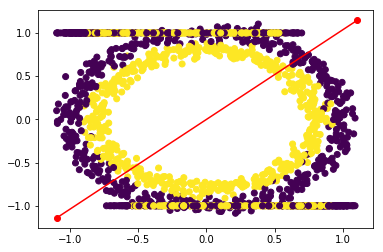

In [7]:
X = np.copy(Xcopy)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

The demarcation mark between the 2 sets of data is correct as it evenly splits both values representing each y values. However it is of no real value.

*TODO*: Calculate the error


#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)

Error: 0.45999546010240827


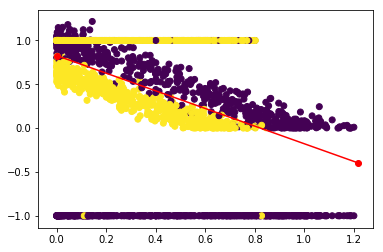

In [8]:
X = np.copy(Xcopy)
X = np.square(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*

Interesting links: 
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  * https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
  * https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

<span style="color:red">TODO: Split between training and testing data.</span>  
<span style="color:red">TODO: Plot data set with decision boundary line.</span>  


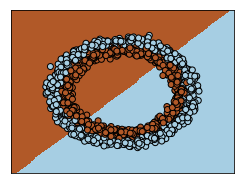

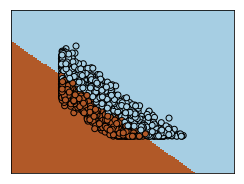

In [9]:
def logistic_regression_scikit(X, Y):
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


# Logistic regression on X
X = np.copy(Xcopy)
logistic_regression_scikit(X, y)

# Logistic regression on X square
logistic_regression_scikit(np.square(X), y)


# Backup work beyond this point. Do not review

X.shape        :(1000, 3)
y.len          :1000
X_inverse      :[[ 0.00100127  0.00099873  0.00099911 ...  0.00100111  0.00100116
   0.00100137]
 [-0.00026375 -0.00070132  0.00184353 ...  0.00086234 -0.0002067
  -0.00069783]
 [ 0.00209582 -0.00239823 -0.00097183 ...  0.00216596  0.00192619
   0.00213532]]
X_inverse.shape:(3, 1000)
w_lin          :[ 1.22214257e-06 -1.66017578e-03  1.59571094e-03]
w_lin_dot      :[ 1.22214257e-06 -1.66017578e-03  1.59571094e-03]
minx           : -1.095570035343629
maxx           : 1.1031770537610672


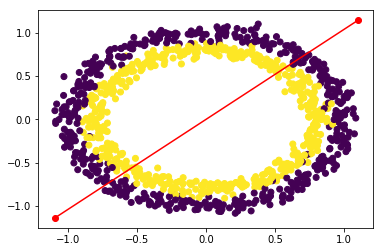

In [10]:
# Add bias=1 column
X = np.insert(X, 0, 1, axis=1)

# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)

# Plot the data set
plt.scatter(X[:,1], X[:,2], c=y)

# Plot the decision boundary
minx = np.amin(X)
maxx = np.amax(X)
miny, maxy = decision_boundary_lin(w_lin, minx, maxx)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

# Alternative decision boundary
#horz = np.linspace(minx, maxx, 1000)
#vert = w_lin[0]*X + w_lin[1]
#plt.plot(horz, vert, color='blue')

# Alternative approach for drawing the separating line.
#yhat = X.dot(w_lin)
#plt.plot(X, yhat, color='red')
#plt.plot(X, np.sign(yhat), color='red')
#plt.plot(X, y, color='red')
#sign = np.sign(yhat)

# Debug
print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)


X.shape        :(1000, 3)
y.len          :1000
X_inverse      :[[ 0.00230481 -0.0039284   0.00279044 ... -0.0010942   0.00474836
   0.00031825]
 [-0.00362998  0.00351507 -0.00103753 ...  0.00068682 -0.00629805
  -0.0010929 ]
 [ 0.00044883  0.00840722 -0.00329153 ...  0.00437188 -0.00280277
   0.00272767]]
X_inverse.shape:(3, 1000)
w_lin          :[ 3.62659065 -4.40827497 -4.38147738]
w_lin_dot      :[ 3.62659065 -4.40827497 -4.38147738]
minx           : 3.968512558524676e-08
maxx           : 1.2169996119449487
miny           : 0.8277095067633822
maxy           : -0.3967333669752619


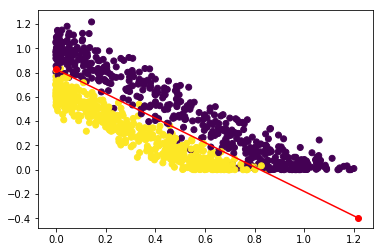

In [11]:
X = np.copy(Xcopy)

# Square the data
Xsq = np.square(X)

# Add bias=1 column
X = np.insert(Xsq, 0, 1, axis=1)

# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

# Plot the data set
plt.scatter(X[:,1], X[:,2], c=y)

# Plot the decision boundary
minx = np.amin(Xsq)
maxx = np.amax(Xsq)
miny, maxy = decision_boundary_lin(w_lin, minx, maxx)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

# Debug - Remove
print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("miny           :", miny)
print("maxy           :", maxy)
